In [1]:
import polars as pl
import matplotlib.pyplot as plt

In [2]:
df = pl.read_excel('dados/projecoes_2024_tab2_grupo_quinquenal.xlsx')

In [3]:
df.head()

GRUPO ETÁRIO,SEXO,CÓD.,SIGLA,LOCAL,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030,2031,…,2034,2035,2036,2037,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050,2051,2052,2053,2054,2055,2056,2057,2058,2059,2060,2061,2062,2063,2064,2065,2066,2067,2068,2069,2070
str,str,i64,str,str,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,…,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64
""" 00-04""","""Ambos""",0,"""BR""","""Brasil""",17281547,17123682,16906493,16640256,16343284,16051105,15806173,15551584,15329999,15140576,14926565,14732570,14645770,14585062,14577213,14679432,14705019,14647172,14636517,14570633,14349330,14102904,13820837,13421242,13017992,12674414,12380087,12136911,11925707,11724741,11547274,11387815,…,10986850,10873117,10766566,10665345,10568366,10474635,10382826,10292025,10202128,10112750,10023192,9933056,9842172,9750554,9657732,9562852,9465427,9365666,9263843,9159606,9052463,8942514,8830712,8718377,8606226,8494854,8385560,8279456,8177111,8079433,7987391,7901241,7820627,7744772,7673320,7606268,7543093
""" 05-09""","""Ambos""",0,"""BR""","""Brasil""",17378990,17390172,17379924,17349975,17303761,17217876,17064624,16851635,16589485,16296374,16004125,15753231,15491395,15260323,15057076,14841043,14662314,14581565,14518069,14506665,14609239,14638890,14588148,14589745,14531027,14303619,14048266,13766965,13377961,12980620,12642552,12353311,…,11708545,11532031,11372430,11226909,11093601,10970904,10856939,10750226,10648948,10552061,10458544,10367093,10276714,10187204,10098226,10009063,9919300,9828783,9737507,9645040,9550503,9453413,9353993,9252488,9148544,9041733,8932109,8820606,8708567,8596707,8485608,8376598,8270750,8168636,8071186,7979360,7893433
""" 10-14""","""Ambos""",0,"""BR""","""Brasil""",17599378,17471598,17382310,17339680,17333773,17348818,17360770,17351252,17322069,17276557,17190853,17038072,16826125,16564772,16271685,15981250,15735526,15476458,15246274,15044385,14830142,14653596,14575329,14515508,14505688,14606009,14632529,14580321,14582319,14523060,14295224,14039540,…,12971860,12633768,12344382,12105432,11897649,11698969,11522206,11362393,11216781,11083480,10960890,10847158,10740735,10639728,10543088,10449800,10358572,10268418,10179144,10090395,10001431,9911890,9821580,9730508,9638227,9543886,9446978,9347726,9246401,9142645,9036015,8926567,8815236,8703349,8591634,8480688,8371817
""" 15-19""","""Ambos""",0,"""BR""","""Brasil""",17831344,17866394,17852790,17786266,17669276,17529669,17403541,17315686,17274236,17269246,17259413,17243723,17229588,17206161,17167306,17083436,16928752,16710472,16442716,16161907,15893053,15663254,15402409,15169410,14971635,14763017,14593065,14521488,14468158,14464297,14570091,14600441,…,14493550,14266334,14011233,13730329,13342170,12945738,12608347,12319635,12081344,11874231,11676304,11500343,11341350,11196483,11063895,10941968,10828856,10723045,10622614,10526515,10433758,10343047,10253385,10164609,10076329,9987833,9898732,9808849,9718189,9626310,9532355,9435826,9336980,9236029,9132638,9026379,8917283
""" 20-24""","""Ambos""",0,"""BR""","""Brasil""",16402228,16826765,17170628,17423254,17594842,17692430,17729519,17718310,17653664,17537757,17342029,17119673,16972759,16901546,16881653,16884209,16881225,16849457,16789776,16747832,16702146,16592992,16396616,16138175,15865912,15601880,15386894,15162593,14970007,14806068,14630502,14488996,…,14400712,14508531,14539427,14489752,14492739,14434432,14208503,13954789,13675492,13289639,12895768,12560773,12274276,12037950,11832589,11636346,11461973,11304429,11160921,11029622,10908928,10796985,10692279,10592900,10497828,10406038,10316293,10227566,10139675,10052257,9964592,9876311,9787218,9697332,9606213,9512994,9417186


In [4]:
df = df.drop(['CÓD.', 'SIGLA'])

In [5]:
df.select(pl.col('SEXO').unique())

SEXO
str
"""Mulheres"""
"""Ambos"""
"""Homens"""


In [6]:
df.select(pl.col('LOCAL').unique())

LOCAL
str
"""Alagoas"""
"""Rio Grande do Sul"""
"""Distrito Federal"""
"""Minas Gerais"""
"""Centro-Oeste"""
…
"""Rondônia"""
"""Piauí"""
"""Maranhão"""


In [7]:
df = df.filter([
    (pl.col('SEXO') == 'Ambos'),
    (pl.col('LOCAL') == 'Brasil')
])

In [8]:
print(df.select(pl.col('SEXO').unique()))
print(df.select(pl.col('LOCAL').unique()))

shape: (1, 1)
┌───────┐
│ SEXO  │
│ ---   │
│ str   │
╞═══════╡
│ Ambos │
└───────┘
shape: (1, 1)
┌────────┐
│ LOCAL  │
│ ---    │
│ str    │
╞════════╡
│ Brasil │
└────────┘


In [9]:
print(df.columns)

['GRUPO ETÁRIO', 'SEXO', 'LOCAL', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024', '2025', '2026', '2027', '2028', '2029', '2030', '2031', '2032', '2033', '2034', '2035', '2036', '2037', '2038', '2039', '2040', '2041', '2042', '2043', '2044', '2045', '2046', '2047', '2048', '2049', '2050', '2051', '2052', '2053', '2054', '2055', '2056', '2057', '2058', '2059', '2060', '2061', '2062', '2063', '2064', '2065', '2066', '2067', '2068', '2069', '2070']


In [10]:
df = df.drop(['SEXO', 'LOCAL'])

In [11]:
df = df.rename({'GRUPO ETÁRIO': 'grupo_etario'})

In [12]:
print(df.columns)

['grupo_etario', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024', '2025', '2026', '2027', '2028', '2029', '2030', '2031', '2032', '2033', '2034', '2035', '2036', '2037', '2038', '2039', '2040', '2041', '2042', '2043', '2044', '2045', '2046', '2047', '2048', '2049', '2050', '2051', '2052', '2053', '2054', '2055', '2056', '2057', '2058', '2059', '2060', '2061', '2062', '2063', '2064', '2065', '2066', '2067', '2068', '2069', '2070']


In [13]:
df_tidy = df.unpivot(
    index='grupo_etario',
    on=[str(x) for x in range(2000, 2071)],
    variable_name='ano',
    value_name='populacao'
)

In [14]:
df_tidy.head()

grupo_etario,ano,populacao
str,str,i64
""" 00-04""","""2000""",17281547
""" 05-09""","""2000""",17378990
""" 10-14""","""2000""",17599378
""" 15-19""","""2000""",17831344
""" 20-24""","""2000""",16402228


In [15]:
df_grouped = df_tidy.group_by('ano').agg(
    pl.col('populacao').sum().alias('populacao_br')
)

In [16]:
df_grouped = df_grouped.with_columns(
    pl.col('ano').cast(int)
)

In [17]:
df_grouped.head()

ano,populacao_br
i64,i64
2000,174695935
2005,185518369
2007,189458827
2013,199226702
2036,219681891


In [18]:
df_pd = df_grouped.to_pandas()

In [19]:
df_pd.head()

,ano,populacao_br
0,2000,174695935
1,2005,185518369
2,2007,189458827
3,2013,199226702
4,2036,219681891


In [20]:
df_pd = df_pd.sort_values('ano').reset_index(drop=True)

In [21]:
df_pd.head()

,ano,populacao_br
0,2000,174695935
1,2001,177003743
2,2002,179228254
3,2003,181377654
4,2004,183469593


In [22]:
df_pd.dtypes

ano             int64
populacao_br    int64
dtype: object

In [23]:
num_habintes_pico = df_pd.query("populacao_br == populacao_br.max()").reset_index()['ano'].sum()

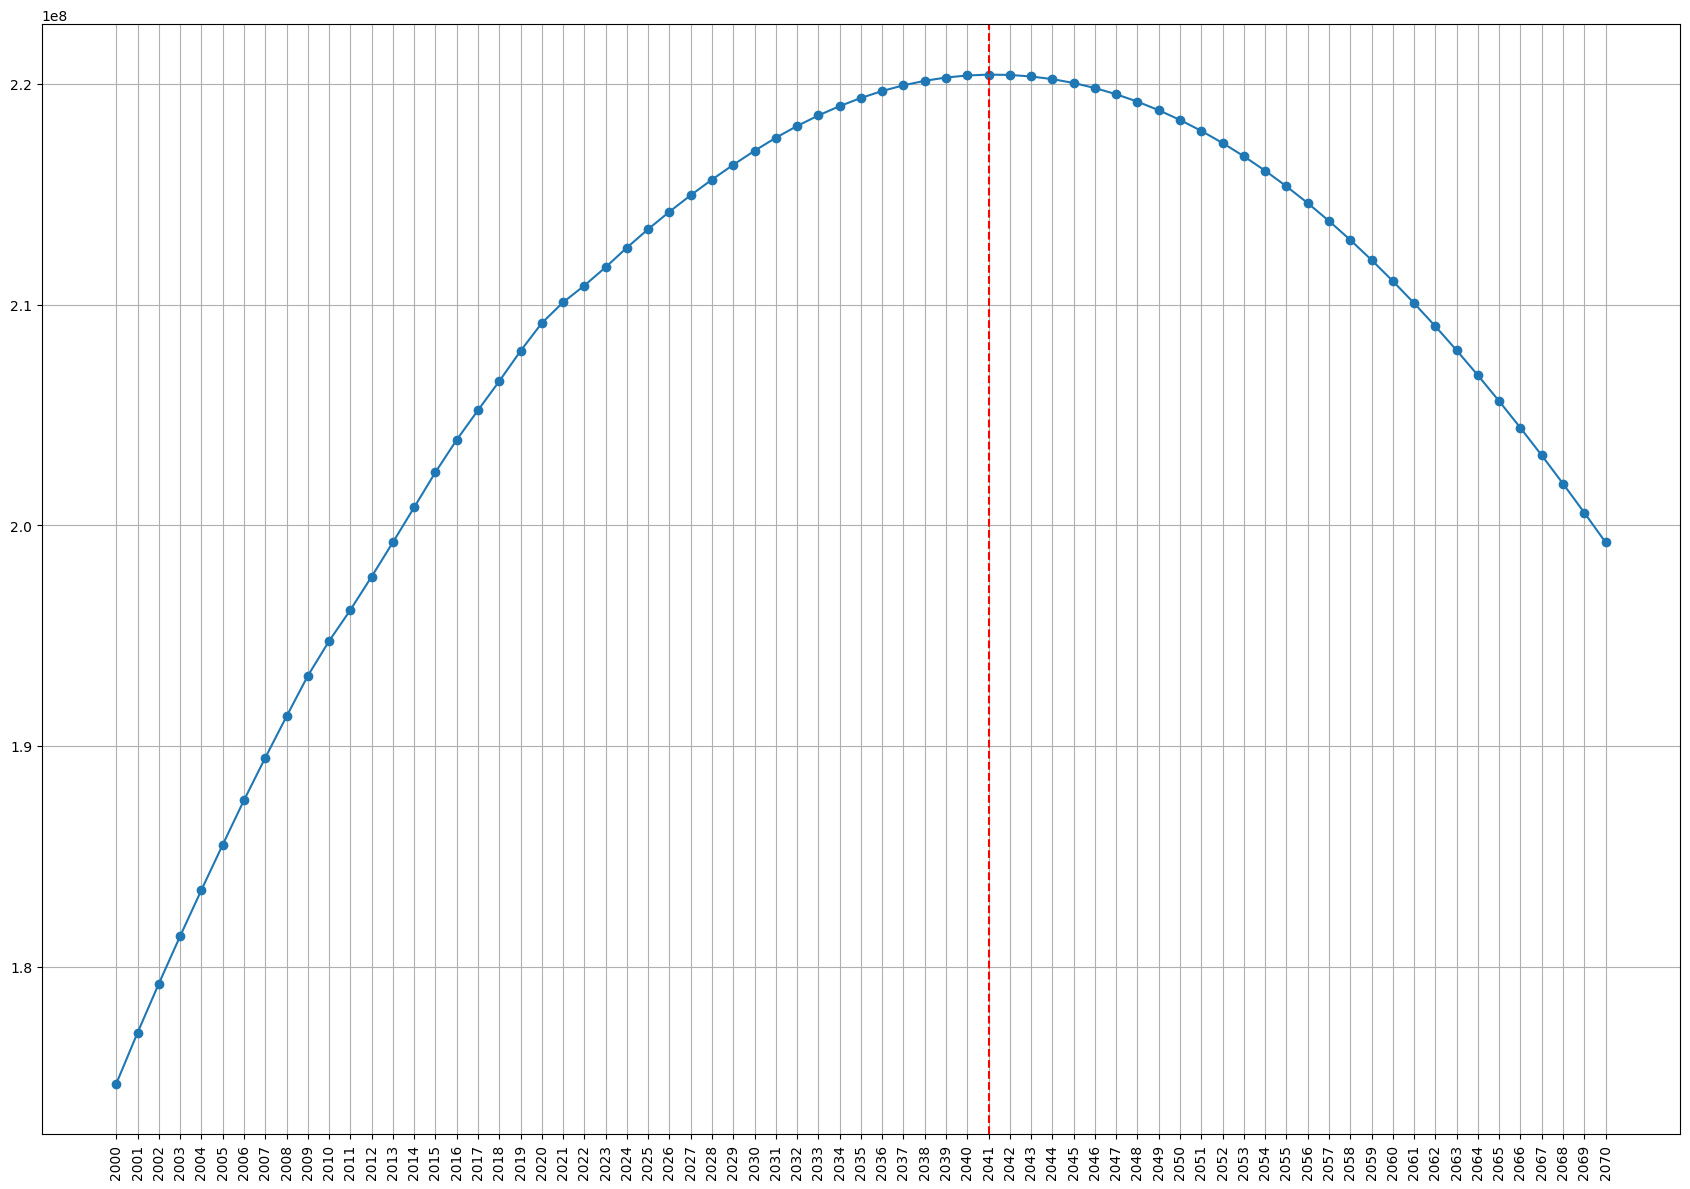

In [24]:
fig, ax = plt.subplots(figsize=(17, 12))

x = df_pd['ano']
y = df_pd['populacao_br']

ax.plot(x, y, marker='o')
ax.tick_params('x', rotation=90)
ax.grid()
ax.set_xticks(x.unique())
ax.axvline(num_habintes_pico, linestyle='--', color='red')
#plt.title('Projeção da população brasileira pelo IBGE')

plt.tight_layout()
fig.savefig('projecao_populacao_br.png', dpi=300, bbox_inches='tight')
plt.show()

In [25]:
df_pd.query("populacao_br == populacao_br.min()")

,ano,populacao_br
0,2000,174695935


In [26]:
df_pd.query("populacao_br == populacao_br.max()")

,ano,populacao_br
41,2041,220425299


In [27]:
df_pd.query("ano == 2070")

,ano,populacao_br
70,2070,199228708


In [28]:
df_pd.query("ano == 2013")

,ano,populacao_br
13,2013,199226702


In [29]:
ano_2070 = df_pd.query("ano == 2070")['populacao_br'].sum()
ano_2013 = df_pd.query("ano == 2013")['populacao_br'].sum()
ano_2070 - ano_2013

np.int64(2006)